In [1]:
import numpy as np
import tensorflow as tf

from keras.datasets import cifar10
from keras.utils import np_utils
#from keras.models import Sequential
#from keras.layers import Dense, Flatten
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 12s 0us/step


In [3]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

In [4]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [5]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [6]:
model = Sequential()

In [7]:
model.add(Conv2D(32,(3,3), activation="relu", padding="same", input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

In [8]:
model.add(Conv2D(64,(3,3), activation="relu", padding="same", input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

In [9]:
model.add(Conv2D(64,(3,3), activation="relu", padding="same", input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

In [10]:
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.4))

In [11]:
model.add(Dense(10, activation="softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          3

In [13]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_fil = model.fit(x_train, y_train, epochs=20, batch_size=50, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 21s 517us/sample - loss: 1.8728 - accuracy: 0.3130 - val_loss: 1.5541 - val_accuracy: 0.4653
Epoch 2/20
40000/40000 [==============================] - 20s 505us/sample - loss: 1.5110 - accuracy: 0.4586 - val_loss: 1.3490 - val_accuracy: 0.5202
Epoch 3/20
40000/40000 [==============================] - 20s 512us/sample - loss: 1.3708 - accuracy: 0.5079 - val_loss: 1.1946 - val_accuracy: 0.5710
Epoch 4/20
40000/40000 [==============================] - 20s 512us/sample - loss: 1.2866 - accuracy: 0.5440 - val_loss: 1.1388 - val_accuracy: 0.6008
Epoch 5/20
40000/40000 [==============================] - 20s 502us/sample - loss: 1.2257 - accuracy: 0.5674 - val_loss: 1.0406 - val_accuracy: 0.6285
Epoch 6/20
40000/40000 [==============================] - 20s 509us/sample - loss: 1.1749 - accuracy: 0.5845 - val_loss: 1.0150 - val_accuracy: 0.6484
Epoch 7/20
40000/40000 [====================

In [14]:
results = model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [15]:
print(results)

[0.8131894450187683, 0.7159]


In [16]:
history_dict = model_fil.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [17]:
model_fil.history["accuracy"]

[0.313,
 0.45855,
 0.507925,
 0.54405,
 0.567375,
 0.584525,
 0.6028,
 0.6158,
 0.62175,
 0.6304,
 0.642475,
 0.64445,
 0.655125,
 0.657075,
 0.66725,
 0.66175,
 0.67265,
 0.67635,
 0.67775,
 0.6839]

In [18]:
acc = model_fil.history["accuracy"]
val_acc = model_fil.history["val_accuracy"]
loss = model_fil.history["loss"]
val_loss = model_fil.history["val_loss"]

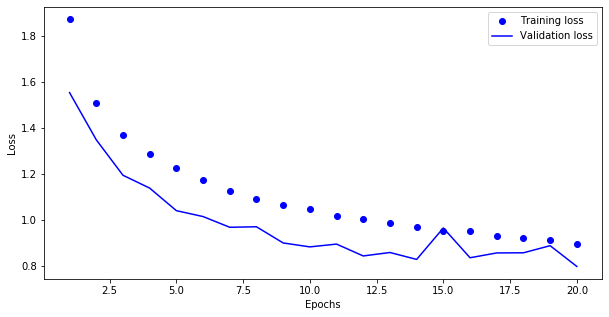

In [19]:
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(10,5))
plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

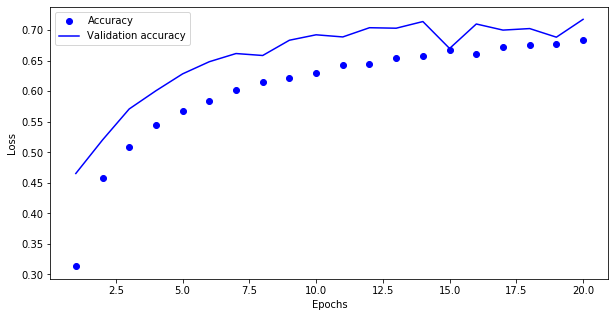

In [20]:
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(10,5))
plt.plot(epochs, acc, "bo", label = "Accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [21]:
import numpy as np
from tensorflow.python.keras.preprocessing import image as kimage
test_image1 = kimage.load_img("moose.jpg", target_size=(32,32))

FileNotFoundError: [Errno 2] No such file or directory: 'moose.jpg'

In [ ]:
test_image = kimage.img_to_array(test_image1)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

print(result)
if result[0][0]==1:
    print("Airplane")
elif result[0][1]==1:
    print("Autmobile")
elif result[0][2]==1:
    print("Bird")
elif result[0][3]==1:
    print("Cat")
elif result[0][4]==1:
    print("Deer")
elif result[0][5]==1:
    print("Dog")
elif result[0][6]==1:
    print("Frog")
elif result[0][7]==1:
    print("Horse")
elif result[0][8]==1:
    print("Ship")
elif result[0][9]==1:
    print("Truck")
else:
    print("Error")